## Assignment week 05: Sleeping habits

Welcome to **week five** of this course programming 1. You will learn about analysing data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the Sleep Study data in an appropiate format in order to conduct statistical and visual analysis. Learning outcomes:


## About the data

The data is collected from a survey-based study of the sleeping habits of individuals within the US. 

Below is a description of each of the variables contained within the dataset.

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?

The two research questions you should answer in this assignment are:
1. Is there a differences in Hours sleep caused by having breakfast (yes, no)?
2. Is there a differences in Hours sleep caused by having breakfast and the tireness (score)


The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: data inspection](#1)
- [part 3: check assumptions](#2)
   - [check normality 3.1](#ex-31)
   - [check equal variance 3.2](#ex-32)
- [part 4: prepare the data](#3)
- [part 5: answer the research question](#4)
- [part 6: enhanced plotting](#5)

Part 1 till 5 are mandatory, part 6 is optional (bonus)
To pass the assingnment you need to a score of 60%. 


**NOTE If your project data is suitable you can use that data instead of the given data**

## ANOVA

Analysis of variance (ANOVA) compares the variances between groups versus within groups. It basically determines whether the differences between groups is larger than the differences within a group (the noise). 
A graph picturing this is as follow: https://link.springer.com/article/10.1007/s00424-019-02300-4/figures/2


In ANOVA, the dependent variable must be a continuous (interval or ratio) level of measurement. For instance Glucose level. The independent variables in ANOVA must be categorical (nominal or ordinal) variables. For instance trial category, time of day (AM versus PM) or time of trial (different categories). Like the t-test, ANOVA is also a parametric test and has some assumptions. ANOVA assumes that the data is normally distributed.  The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal. ANOVA also assumes that the observations are independent of each other. 

A one-way ANOVA has just one independent variable. A two-way ANOVA (are also called factorial ANOVA) refers to an ANOVA using two independent variables. For research question 1 we can use the one-way ANOVA, for research question two we can use two-way ANOVA. But first we need to check the assumptions. 


---

<a name='0'></a>
## Part 1: Load the data (10 pt)

load the `sleep.csv` data. Get yourself familiar with the data. Answer the following questions.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype? 

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, shapiro
import pingouin as pg
from bioinfokit.analys import stat
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import Range1d, CategoricalColorMapper, Legend, ColumnDataSource, LinearColorMapper, ColorBar, BasicTicker, Span, Label
from bokeh.palettes import Colorblind, Plasma256
from bokeh.transform import transform
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
#code printing percentage missing data

PATH = "../data/sleep.csv"
df = pd.read_csv(PATH)
print(f"{(df.isnull().sum()/len(df))*100}")
df = df.dropna()

Enough        0.000000
Hours         1.923077
PhoneReach    0.000000
PhoneTime     0.000000
Tired         0.000000
Breakfast     0.000000
dtype: float64


In [3]:
#code printing answer dependent and independent variables
print(f"Dependent variable = {df.Hours.name}")
print(f"Independent variables = {[col for col in df.drop(columns=['Hours']).columns]}")

Dependent variable = Hours
Independent variables = ['Enough', 'PhoneReach', 'PhoneTime', 'Tired', 'Breakfast']


In [4]:
#code printing answer about datatypes
print(df.info())

# Create numeric for heatmap
numeric_df = df.copy()
numeric_df.Enough = numeric_df.Enough.eq('Yes').mul(1)
numeric_df.PhoneReach = numeric_df.PhoneReach.eq('Yes').mul(1)
numeric_df.PhoneTime = numeric_df.PhoneTime.eq('Yes').mul(1)
numeric_df.Tired = numeric_df.Tired.astype('int64')

df.Enough = df.Enough.astype('category')
df.PhoneReach = df.PhoneReach.astype('category')
df.PhoneTime = df.PhoneTime.astype('category')
df.Tired = df.Tired.astype('category')
df.Breakfast = df.Breakfast.astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      102 non-null    object 
 1   Hours       102 non-null    float64
 2   PhoneReach  102 non-null    object 
 3   PhoneTime   102 non-null    object 
 4   Tired       102 non-null    int64  
 5   Breakfast   102 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Enough      102 non-null    category
 1   Hours       102 non-null    float64 
 2   PhoneReach  102 non-null    category
 3   PhoneTime   102 non-null    category
 4   Tired       102 non-null    category
 5   Breakfast   102 non-null    category
dtypes: category(5), float64(1)
memory usage: 2.7 KB
None


---

<a name='1'></a>
## Part 2: Inspect the data (30 pt)

Inspect the data practically. Get an idea about how well the variable categories are ballanced. Are the values of a variable equally divided? What is the mean value of the dependent variable? Are there correlations amongs the variables?


<ul>
<li>Create some meaninful overviews such as variable value counts</li>
<li>Create a scatter plot ploting the relation between being tired and hours of sleep with different colors for Breakfast</li>
    <li>Print some basic statistics about the target (mean, standard deviation)</li>
    <li>Create a heatmap to check for correlations among variables. </li>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>the gitbook has a bokeh heatmap example</li></ul>
</details>
</ul>

In [5]:
#code your answer to the value counts and distribution plots here
def make_plot(title, x, y):
    p = figure(x_range=x, plot_height=300, title=f"Distribution of variable {title}")
    p.vbar(x=x, top=y, width=0.8, color="darkgreen")
    p.xaxis.axis_label = "value"
    p.yaxis.axis_label = "count"
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    return p

def show_info(df):
    g = []
    for column_name in df.drop(columns=['Hours']).columns:
        value_counts = df[column_name].value_counts()
        labels = list(value_counts.index.astype(str))
        print(f"{value_counts}\n")
        p = make_plot(column_name, labels, value_counts)
        g.append(p)
    show(gridplot(g, ncols=2, plot_width=450, plot_height=300))

show_info(df)

No     67
Yes    35
Name: Enough, dtype: int64

Yes    71
No     31
Name: PhoneReach, dtype: int64

Yes    83
No     19
Name: PhoneTime, dtype: int64

3    39
2    26
4    23
5    10
1     4
Name: Tired, dtype: int64

Yes    61
No     41
Name: Breakfast, dtype: int64



In [6]:
tscore = df.copy()
tscore_mean = tscore.groupby(['Tired', 'Breakfast'])['Hours'].mean()
print(tscore_mean)

Tired  Breakfast
1      No           7.000000
       Yes          8.333333
2      No           6.428571
       Yes          6.736842
3      No           6.266667
       Yes          7.000000
4      No           6.727273
       Yes          6.750000
5      No           5.285714
       Yes          6.666667
Name: Hours, dtype: float64


In [7]:
#code for the scatter plot here
p = figure(title="Having breakfast against Hours slept and tireness score",
           plot_width=900, 
           plot_height=600)
p.add_layout(Legend(), 'right')
p.legend.title = "Had Breakfast"
cat_color_mapper = CategoricalColorMapper(factors=[x for x in df['Breakfast'].unique()], 
                                          palette=Colorblind[8])
p.circle('Tired', 'Hours', legend_group='Breakfast', size=20,
        color=dict(field='Breakfast', transform=cat_color_mapper), source=df)
p.xaxis.axis_label = "Tireness score"
p.yaxis.axis_label = "Hours slept"
p.y_range.start = 0

show(p)

In [8]:
#code your answer to the target statistics here
df.Hours.describe()

count    102.000000
mean       6.656863
std        1.417676
min        2.000000
25%        6.000000
50%        7.000000
75%        7.000000
max       10.000000
Name: Hours, dtype: float64

In [9]:
#code your answer for the heatmap here and briefly state your finding
# Based on code by Fenna Feenstra
c = numeric_df.corr().abs()
display(c)

corr_df = pd.DataFrame(c.stack(), columns=['correlation']).reset_index()
source = ColumnDataSource(corr_df)

p = figure(title="Heatmap of correlations between variables", 
           plot_width=600, 
           plot_height=300,
           x_range=(list(reversed(c.columns))),
           y_range=(list(c.index)),
           toolbar_location=None)

lin_color_mapper = LinearColorMapper(palette=Plasma256, 
                                     low=corr_df.correlation.min(), 
                                     high=corr_df.correlation.max())

p.rect(x='level_0', y='level_1', 
       width=1, height=1, source=source, line_color=None,
       fill_color=transform('correlation', lin_color_mapper))

colorbar = ColorBar(color_mapper=lin_color_mapper,
                   location=(0, 0), 
                   ticker=BasicTicker(desired_num_ticks=len((list(reversed(c.columns))))))
p.add_layout(colorbar, 'right')
show(p)

,Enough,Hours,PhoneReach,PhoneTime,Tired
Enough,1.000000,0.380740,0.061183,0.025481,0.410416
Hours,0.380740,1.000000,0.054957,0.151378,0.191913
PhoneReach,0.061183,0.054957,1.000000,0.176592,0.089936
PhoneTime,0.025481,0.151378,0.176592,1.000000,0.032974
Tired,0.410416,0.191913,0.089936,0.032974,1.000000


---

<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normaly distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

<a name='ex-31'></a>
### Check normality (10 pt)

<ul><li>
Plot the distribution of the dependent variable. Add a vertical line at the position of the average. Add a vertical line for the robuust estimation. Add the normal distribution line to the plot. Comment on the normallity of the data. Do you want the full points? Plot with bokeh!</li>

<li>Use a Shapiro-Wilk Test or an Anderson-Darling test to check statistically</li></ul>


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>check the code of lesson 1 DS1 bayesian statistics</li>
        <li>heart_failure case of gitbook uses bokeh histograms</li>
</ul>
</details>

In [10]:
# your code to plot here
mean = df.Hours.mean()
std = df.Hours.std()
median = df.Hours.median()
print(f"mean = {mean}\nstd = {std}\nmedian = {median}")
x = np.linspace(0,12, 1000)
pdf = np.array([norm.pdf(xi, loc=mean, scale=std) for xi in x])

hist, edges = np.histogram(df.Hours, density=True)


mean = 6.6568627450980395
std = 1.4176755346582757
median = 7.0


In [11]:
# briefly summarize your findings
print(shapiro(df.Hours))
# display(df.Hours.value_counts().sort_index())

ShapiroResult(statistic=0.93398118019104, pvalue=7.15833084541373e-05)


<a name='ex-32'></a>
### Check homogeneity of variance (20 pt)

<ul><li>
Use boxplots for the check of homoegeneity of variance. Do you want the full points? Plot with bokeh!</li>

<li>Use a Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance to test equal variance statistically</li><ul>

In [12]:
int2cat = {1:"no", 2:"no", 3:"maybe", 4:"yes", 5:"yes"}
df.Tired = df.Tired.map(int2cat)

<AxesSubplot:title={'center':'Hours'}, xlabel='[Breakfast, Tired]'>

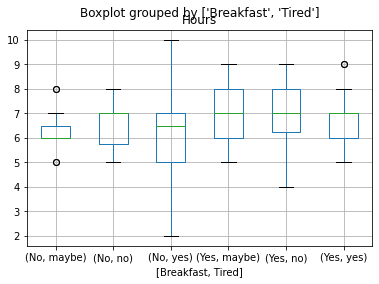

In [13]:
# your code to plot here
df.boxplot(by=['Breakfast', 'Tired'])

In [14]:
# your code for the statistical test here
tscore = df.copy()
tscore_std = tscore.groupby(['Breakfast', 'Tired'])['Hours'].count()
display(tscore_std)

Breakfast  Tired
No         maybe    15
           no        8
           yes      18
Yes        maybe    24
           no       22
           yes      15
Name: Hours, dtype: int64

In [15]:
df['group'] = df[['Breakfast', 'Tired']].agg('-'.join, axis=1)
pg.homoscedasticity(df,dv='Hours',group='group')

,W,pval,equal_var
levene,2.87875,0.01823,False


In [16]:
# briefly summarize your findings

- There are unequal sample sizes
- The Shapiro-wilk test shows a very low p-value, H0: From a normal distribution can be rejected
- The homoscedasticity test returns that the variance is not equal

---

<a name='3'></a>
## Part 4: Prepare your data (10 pt)

Create a dataframe with equal samplesize. Make three categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes

,W,pval,equal_var
levene,0.579487,0.715394,True


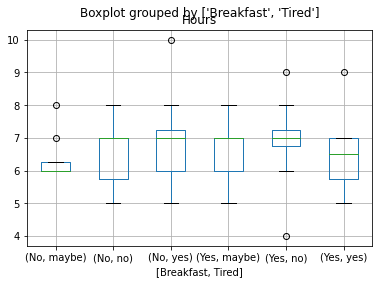

In [29]:
#your solution here
eq_sample_size = df.groupby(['Breakfast', 'Tired'])['Hours']
eq_sample_size = eq_sample_size.apply(lambda x: x.sample(8)).reset_index()
eq_sample_size = eq_sample_size.drop('level_2', axis=1)
eq_sample_size['group'] = eq_sample_size[['Breakfast', 'Tired']].agg('-'.join, axis=1)
eq_sample_size.boxplot(by=['Breakfast', 'Tired'])
pg.homoscedasticity(eq_sample_size,dv='Hours',group='group')

- The homoscedasticity test returns that the variance __is__ equal

---

<a name='4'></a>
## Part 5: Answer the research questions (20 pt)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>use one-way ANOVA for research question 1</li>
    <li>Use two-way ANOVA for research question 2</li>
    <li>https://reneshbedre.github.io/blog/anova.html</li>
</ul>
</details>

In [30]:
#Your solution here

In [31]:
res = stat()
res.anova_stat(df=eq_sample_size, res_var='Hours', anova_model='Hours ~ C(Breakfast)')
res.anova_summary
# sample.columns

,df,sum_sq,mean_sq,F,PR(>F)
C(Breakfast),1.0,0.020833,0.020833,0.015222,0.902347
Residual,46.0,62.958333,1.368659,NaN,NaN


### Is there a differences in Hours sleep caused by having breakfast (yes, no)?
- Here we can conclude that since PR(>F) is highly above the alpha of 0.05 that we cannot reject H0: Breakfast has no significant effect on Hours slept, and there is no difference in hours sleep caused by having breakfast

In [32]:
res = stat()
res.anova_stat(df=eq_sample_size, res_var='Hours', anova_model='Hours ~ C(Breakfast)+C(Tired)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Breakfast),1.0,0.020833,0.020833,0.014686,0.904095
C(Tired),2.0,0.541667,0.270833,0.190921,0.826878
Residual,44.0,62.416667,1.418561,NaN,NaN


### Is there a differences in Hours sleep caused by having breakfast and the tireness (score)
- Here we can conclude that since PR(>F) is highly above the alpha of 0.05 that we cannot reject H0: Breakfast and the tireness score have no significant effect on Hours slept, and there is no difference in hours sleep caused by having breakfast and the tireness score

---

<a name='5'></a>
## Part 6: Enhanced plotting (20 pt)

Create a panel with 1) your dataframe with equal samplesize 2) a picture of a sleeping beauty, 3) the scatter plot of tired / hours of sleep with different colors for Breakfast from part 2 4) the boxplots given the p-value for the anova outcome in the title

In [21]:
#your solution here